# Convolutional Neural Networks: Application

## Packages

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
import utils

%matplotlib inline

## Load the Data and Split the Data into Train/Test Sets

We'll be using the Happy House dataset for this part of the assignment, which contains images of peoples' faces. Your task will be to build a ConvNet that determines whether the people in the images are smiling or not -- because they only get to enter the house if they're smiling!  

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = utils.load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


We can display the images contained in the dataset. Images are 64x64 pixels in RGB format (3 channels).

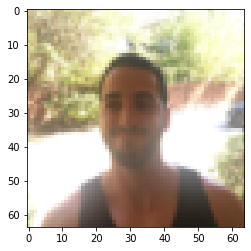

In [5]:
index = 70
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

## The Sequential API

For the first part, we'll create a model using TF Keras' Sequential API, which allows you to build layer by layer, and is ideal for building models where each layer has **exactly one** input tensor and **one** output tensor. 

As we'll see, using the Sequential API is simple and straightforward, but is only appropriate for simpler, more straightforward tasks. Later in this notebook you'll spend some time building with a more flexible, powerful alternative: the Functional API. 

### Create the Sequential Model

As mentioned earlier, the TensorFlow Keras Sequential API can be used to build simple models with layer operations that proceed in a sequential order. 

Actually, you can think of a Sequential model as behaving like a list of layers. Like Python lists, Sequential layers are ordered, and the order in which they are specified matters.  If your model is non-linear or contains layers with multiple inputs or outputs, a Sequential model wouldn't be the right choice!

For any layer construction in Keras, you'll need to specify the input shape in advance. This is because in Keras, the shape of the weights is based on the shape of the inputs. The weights are only created when the model first sees some input data. Sequential models can be created by passing a list of layers to the Sequential constructor, like you will do in the next assignment.

Implement the `happyModel` function below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`.

In [17]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            # Create Input shape
            tfl.InputLayer(input_shape=(64, 64, 3)),
        
            # ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=3),
        
            # Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(32, (7,7), strides=1),
        
            # BatchNormalization for axis 3
            tfl.BatchNormalization(axis=3),
        
            # ReLU
            tfl.ReLU(),
        
            # Max Pooling 2D with default parameters
            tfl.MaxPool2D(),
        
            # Flatten layer
            tfl.Flatten(),
        
            ## Dense layer with 1 unit for output & 'sigmoid' activation           
            tfl.Dense(1, activation='sigmoid')
        ])
    
    return model

Now that the model is created, you can compile it for training with an optimizer and loss of your choice. When the string accuracy is specified as a metric, the type of accuracy used will be automatically converted based on the loss function used. This is one of the many optimizations built into TensorFlow that make your life easier!

In [18]:
happy_model = happyModel()
happy_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

It's time to check your model's parameters with the .summary() method. This will display the types of layers you have, the shape of the outputs, and how many parameters are in each layer.

In [19]:
happy_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_4 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

### Train and Evaluate the Model

After creating the model, compiling it with your choice of optimizer and loss function, and doing a sanity check on its contents, you are now ready to build! 

In [20]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 78ms/step - loss: 1.7250 - accuracy: 0.6450
Epoch 2/10
38/38 [==============================] - 3s 77ms/step - loss: 0.2398 - accuracy: 0.8967
Epoch 3/10
38/38 [==============================] - 3s 77ms/step - loss: 0.2123 - accuracy: 0.9167
Epoch 4/10
38/38 [==============================] - 3s 77ms/step - loss: 0.2024 - accuracy: 0.9217
Epoch 5/10
38/38 [==============================] - 3s 72ms/step - loss: 0.1657 - accuracy: 0.9400
Epoch 6/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0925 - accuracy: 0.9617
Epoch 7/10
38/38 [==============================] - 3s 76ms/step - loss: 0.0712 - accuracy: 0.9783
Epoch 8/10
38/38 [==============================] - 3s 80ms/step - loss: 0.1036 - accuracy: 0.9700
Epoch 9/10
38/38 [==============================] - 3s 75ms/step - loss: 0.0722 - accuracy: 0.9817
Epoch 10/10
38/38 [==============================] - 3s 75ms/step - loss: 0.0863 - accuracy: 0.9700


After that completes, just use .evaluate() to evaluate against your test set. This function will print the value of the loss function and the performance metrics specified during the compilation of the model. In this case, the binary_crossentropy and the accuracy respectively.

In [21]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 33ms/step - loss: 0.8167 - accuracy: 0.6867


[0.8166950941085815, 0.6866666674613953]

Easy, right? But what if you need to build a model with shared layers, branches, or multiple inputs and outputs? This is where Sequential, with its beautifully simple yet limited functionality, won't be able to help you.

## The Functional API

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs. Imagine that, where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility. Where Sequential is a straight line, a Functional model is a graph, where the nodes of the layers can connect in many more ways than one.

### Load the Signs Dataset
As a reminder, the SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

In [22]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = utils.load_signs_dataset()

<img src="images/SIGNS.png">

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

y = 4


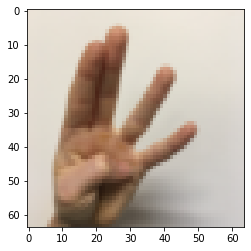

In [23]:
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

### Split the Data into Train/Test Sets
To get started, let's examine the shapes of your data.

In [25]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = utils.convert_to_one_hot(Y_train_orig, 6).T
Y_test = utils.convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


### Forward Propagation
In TensorFlow, there are built-in functions that implement the convolution steps for you. By now, you should be familiar with how TensorFlow builds computational graphs. In the [Functional API](https://www.tensorflow.org/guide/keras/functional), you create a graph of layers. This is what allows such great flexibility.

However, the following model could also be defined using the Sequential API since the information flow is on a single line. But don't deviate. What we want you to learn is to use the functional API.

Begin building your graph of layers by creating an input node that functions as a callable object:

- **input_img = tf.keras.Input(shape=input_shape):** 

Then, create a new node in the graph of layers by calling a layer on the `input_img` object: 

- **tf.keras.layers.Conv2D(filters= ... , kernel_size= ... , padding='same')(input_img):** Read the full documentation on [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

- **tf.keras.layers.MaxPool2D(pool_size=(f, f), strides=(s, s), padding='same'):** `MaxPool2D()` downsamples your input using a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window.  For max pooling, you usually operate on a single example at a time and a single channel at a time. Read the full documentation on [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D).

- **tf.keras.layers.ReLU():** computes the elementwise ReLU of Z (which can be any shape). You can read the full documentation on [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU).

- **tf.keras.layers.Flatten()**: given a tensor "P", this function takes each training (or test) example in the batch and flattens it into a 1D vector.  

    * If a tensor P has the shape (batch_size,h,w,c), it returns a flattened tensor with shape (batch_size, k), where $k=h \times w \times c$.  "k" equals the product of all the dimension sizes other than the first dimension.
    
    * For example, given a tensor with dimensions [100, 2, 3, 4], it flattens the tensor to be of shape [100, 24], where 24 = 2 * 3 * 4.  You can read the full documentation on [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten).

- **tf.keras.layers.Dense(units= ... , activation='softmax')(F):** given the flattened input F, it returns the output computed using a fully connected layer. You can read the full documentation on [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In the last function above (`tf.keras.layers.Dense()`), the fully connected layer automatically initializes weights in the graph and keeps on training them as you train the model. Hence, you did not need to initialize those weights when initializing the parameters.

Lastly, before creating the model, you'll need to define the output using the last of the function's compositions (in this example, a Dense layer): 

- **outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)**


#### Window, kernel, filter, pool

The words "kernel" and "filter" are used to refer to the same thing. The word "filter" accounts for the amount of "kernels" that will be used in a single convolution layer. "Pool" is the name of the operation that takes the max or average value of the kernels. 

This is why the parameter `pool_size` refers to `kernel_size`, and you use `(f,f)` to refer to the filter size. 

Pool size and kernel size refer to the same thing in different objects - They refer to the shape of the window where the operation takes place. 

##  Convolutional Model
Implement the `convolutional_model` function below to build the following model: `CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE`.

In [26]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    input_img = tf.keras.Input(shape=input_shape)

    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(8, (4,4), strides=1, padding='SAME')(input_img)
    
    ## RELU
    A1 = tfl.ReLU()(Z1)
    
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=8, padding='SAME')(A1)
    
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(16, (2,2), strides=1, padding='SAME')(P1)
    
    ## RELU
    A2 = tfl.ReLU()(Z2)
    
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=4, padding='SAME')(A2)
    
    ## FLATTEN
    F = tfl.Flatten()(P2)
    
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    outputs = tfl.Dense(6, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [28]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
conv_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_8 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 16)          0   

Both the Sequential and Functional APIs return a TF Keras model object. The only difference is how inputs are handled inside the object model!

### Train the model


In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 95ms/step - loss: 1.8380 - accuracy: 0.1731 - val_loss: 1.7929 - val_accuracy: 0.1750
Epoch 2/100
17/17 [==============================] - 1s 72ms/step - loss: 1.7899 - accuracy: 0.1852 - val_loss: 1.7891 - val_accuracy: 0.2167
Epoch 3/100
17/17 [==============================] - 1s 75ms/step - loss: 1.7863 - accuracy: 0.1917 - val_loss: 1.7865 - val_accuracy: 0.2250
Epoch 4/100
17/17 [==============================] - 1s 73ms/step - loss: 1.7817 - accuracy: 0.2500 - val_loss: 1.7824 - val_accuracy: 0.2167
Epoch 5/100
17/17 [==============================] - 1s 75ms/step - loss: 1.7771 - accuracy: 0.2667 - val_loss: 1.7782 - val_accuracy: 0.2750
Epoch 6/100
17/17 [==============================] - 1s 71ms/step - loss: 1.7726 - accuracy: 0.2870 - val_loss: 1.7745 - val_accuracy: 0.2917
Epoch 7/100
17/17 [==============================] - 1s 74ms/step - loss: 1.7672 - accuracy: 0.3250 - val_loss: 1.7690 - val_accuracy: 0.3000
Epoch 

17/17 [==============================] - 1s 69ms/step - loss: 0.6388 - accuracy: 0.8065 - val_loss: 0.7408 - val_accuracy: 0.7167
Epoch 59/100
17/17 [==============================] - 1s 74ms/step - loss: 0.6305 - accuracy: 0.8120 - val_loss: 0.7324 - val_accuracy: 0.7083
Epoch 60/100
17/17 [==============================] - 1s 72ms/step - loss: 0.6220 - accuracy: 0.8148 - val_loss: 0.7247 - val_accuracy: 0.7167
Epoch 61/100
17/17 [==============================] - 1s 70ms/step - loss: 0.6145 - accuracy: 0.8157 - val_loss: 0.7181 - val_accuracy: 0.7167
Epoch 62/100
17/17 [==============================] - 1s 70ms/step - loss: 0.6065 - accuracy: 0.8176 - val_loss: 0.7107 - val_accuracy: 0.7250
Epoch 63/100
17/17 [==============================] - 1s 71ms/step - loss: 0.5992 - accuracy: 0.8176 - val_loss: 0.7047 - val_accuracy: 0.7333
Epoch 64/100
17/17 [==============================] - 1s 70ms/step - loss: 0.5918 - accuracy: 0.8194 - val_loss: 0.6986 - val_accuracy: 0.7333
Epoch 65/100

### History object
The history object is an output of the .fit() operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that you can retrieve at history.history:

In [30]:
history.history

{'loss': [1.837961196899414,
  1.78987455368042,
  1.7863496541976929,
  1.7816648483276367,
  1.7771497964859009,
  1.772552490234375,
  1.7672373056411743,
  1.761514663696289,
  1.7514691352844238,
  1.7392327785491943,
  1.7235512733459473,
  1.7053025960922241,
  1.6842573881149292,
  1.660543441772461,
  1.6337224245071411,
  1.6036491394042969,
  1.5720890760421753,
  1.5390188694000244,
  1.505117654800415,
  1.4694238901138306,
  1.4336791038513184,
  1.394749641418457,
  1.35934579372406,
  1.3216243982315063,
  1.2848907709121704,
  1.2493093013763428,
  1.2136465311050415,
  1.1803174018859863,
  1.1470682621002197,
  1.1149344444274902,
  1.083981990814209,
  1.0547021627426147,
  1.0265123844146729,
  1.0004171133041382,
  0.9746768474578857,
  0.9512509107589722,
  0.9285629987716675,
  0.907755970954895,
  0.8870839476585388,
  0.8684135675430298,
  0.8503336906433105,
  0.8339321613311768,
  0.8173986077308655,
  0.8015861511230469,
  0.7863478660583496,
  0.7724507451

Now visualize the loss over time using history.history:

c:\users\lucas\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

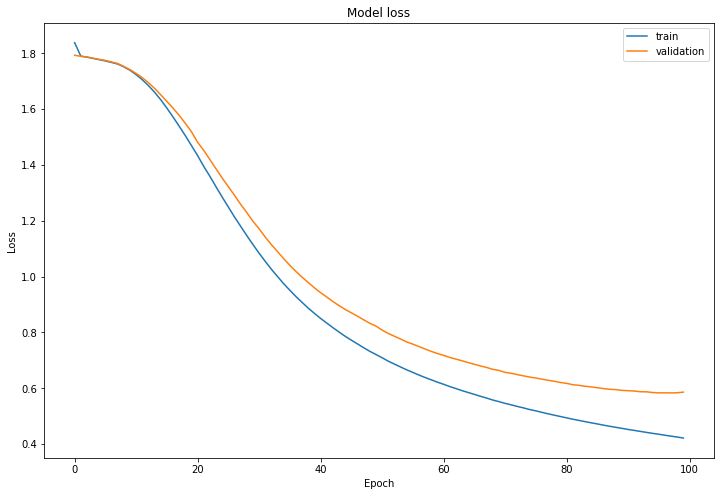

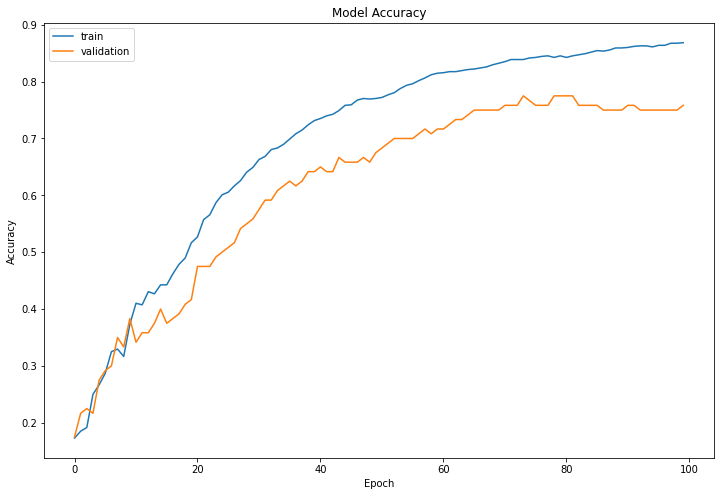

In [31]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')